In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def array(x):
    return x
def parse_list_col(x):
    return eval(x)[0]
def mean_list_col(x):
    return pd.DataFrame(x.values.tolist()).apply("mean", axis = 0).values.tolist()
def std_list_col(x):
    x =  pd.DataFrame(x.values.tolist()).apply("std", axis = 0).values.tolist()
    # print(x)
    return x
def upper_conf_list_col(x):
    mean = mean_list_col(x)
    std = std_list_col(x)
    return (np.array(mean) + 1.96 * np.array(std)).tolist()
def lower_conf_list_col(x):
    mean = mean_list_col(x)
    std = std_list_col(x)
    return (np.array(mean) - 1.96 * np.array(std)).tolist()
    
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
df1 = pd.read_csv("../data/output/DecisionTreeRegressor-sklearnsummary.csv")
# df1["fprs"] = df1["fprs"].apply(parse_list_col)
# df1["tprs"] = df1["tprs"].apply(parse_list_col)
df1

,mse,model_type,r2,model_library
0,6.852948,DecisionTreeRegressor,0.334654,sklearn
1,6.852948,DecisionTreeRegressor,0.334654,sklearn
2,6.852948,DecisionTreeRegressor,0.334654,sklearn
3,6.852948,DecisionTreeRegressor,0.334654,sklearn
4,6.852948,DecisionTreeRegressor,0.334654,sklearn
5,6.852948,DecisionTreeRegressor,0.334654,sklearn
6,6.852948,DecisionTreeRegressor,0.334654,sklearn
7,6.852948,DecisionTreeRegressor,0.334654,sklearn
8,6.852948,DecisionTreeRegressor,0.334654,sklearn
9,6.852948,DecisionTreeRegressor,0.334654,sklearn


In [4]:
df2 = pd.read_csv("../data/output/RandomForestRegressor-sklearnsummary.csv")
# df2["fprs"] = df2["fprs"].apply(parse_list_col)
# df2["tprs"] = df2["tprs"].apply(parse_list_col)
df2

,mse,model_type,r2,model_library
0,9.117688,RandomForestRegressor,0.114773,sklearn
1,9.205006,RandomForestRegressor,0.106295,sklearn
2,9.245775,RandomForestRegressor,0.102337,sklearn
3,9.165936,RandomForestRegressor,0.110088,sklearn
4,9.185764,RandomForestRegressor,0.108163,sklearn
5,9.202799,RandomForestRegressor,0.106509,sklearn
6,9.146835,RandomForestRegressor,0.111943,sklearn
7,9.169304,RandomForestRegressor,0.109761,sklearn
8,9.148606,RandomForestRegressor,0.111771,sklearn
9,9.156348,RandomForestRegressor,0.111019,sklearn


In [6]:
df  = df1.append(df2, ignore_index = True)

In [8]:
summary_df = df.groupby(["model_type"]).agg(
    mean_r2_scores = ("r2","mean"),
    std_r2_scores  = ("r2","std"),
    upper_conf_r2_scores  = ("r2", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_r2_scores  = ("r2", lambda x: np.mean(x) - np.std(x)*1.96),
    mean_mse      = ("mse","mean"),
    std_mse       = ("mse","std"),
    upper_conf_mse  = ("mse", lambda x: np.mean(x) + np.std(x)*1.96),
    lower_conf_mse  = ("mse", lambda x: np.mean(x) - np.std(x)*1.96),
).reset_index()
# print(summary_df)
summary_df

print(summary_df[["model_type","mean_r2_scores","std_r2_scores","upper_conf_r2_scores","lower_conf_r2_scores"]].to_latex())
print(summary_df[["model_type","mean_mse","std_mse","upper_conf_mse","lower_conf_mse"]].to_latex())

              model_type  mean_r2_scores  std_r2_scores  upper_conf_r2_scores  \
0  DecisionTreeRegressor        0.334654        0.00000              0.334654   
1  RandomForestRegressor        0.109266        0.00355              0.115867   

   lower_conf_r2_scores  mean_mse   std_mse  upper_conf_mse  lower_conf_mse  
0              0.334654  6.852948  0.000000        6.852948        6.852948  
1              0.102665  9.174406  0.036563        9.242392        9.106420  
\begin{tabular}{llrrrr}
\toprule
{} &             model\_type &  mean\_r2\_scores &  std\_r2\_scores &  upper\_conf\_r2\_scores &  lower\_conf\_r2\_scores \\
\midrule
0 &  DecisionTreeRegressor &        0.334654 &        0.00000 &              0.334654 &              0.334654 \\
1 &  RandomForestRegressor &        0.109266 &        0.00355 &              0.115867 &              0.102665 \\
\bottomrule
\end{tabular}

\begin{tabular}{llrrrr}
\toprule
{} &             model\_type &  mean\_mse &   std\_mse &  upper\_conf

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}                          &        r2        & \textbf{  R-squared:         } &     1.000   \\
\textbf{Model:}                                  &       OLS        & \textbf{  Adj. R-squared:    } &     1.000   \\
\textbf{Method:}                                 &  Least Squares   & \textbf{  F-statistic:       } & 4.031e+04   \\
\textbf{Date:}                                   & Mon, 23 Nov 2020 & \textbf{  Prob (F-statistic):} &  1.30e-31   \\
\textbf{Time:}                                   &     19:51:17     & \textbf{  Log-Likelihood:    } &    92.423   \\
\textbf{No. Observations:}                       &          20      & \textbf{  AIC:               } &    -180.8   \\
\textbf{Df Residuals:}                           &          18      & \textbf{  BIC:               } &    -178.9   \\
\textbf{Df Model:}                               &           1      & \textbf{                     } &             \\
\bottomrul

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     r2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.031e+04
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.30e-31
Time:                        19:51:17   Log-Likelihood:                 92.423
No. Observations:                  20   AIC:                            -180.8
Df Residuals:                      18   BIC:                            -178.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  0.3347      0.001    421.600      0.000       0.333       0.336
C(model_type)[T.RandomForestRegressor]    -0.2254      0.001   -200.780      0.000      -0.228      -0.223
==============================================================================
Omnibus:                        7.503   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.107
Skew:                          -0.641   Prob(JB):                       0.0472
Kurtosis:                       5.384   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

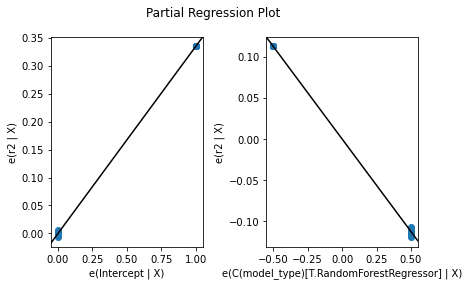

In [10]:
summary_df_model = df[["r2","model_type"]]
mod = smf.ols(formula='r2 ~ C(model_type)', data=summary_df_model)
res = mod.fit()
print(res.summary().as_latex())
fig = sm.graphics.plot_partregress_grid(res)
fig.tight_layout(pad=1.0)
res.summary()